In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [27]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Auto Sales data.csv')
print(data.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of To

In [28]:
# Summary statistics of numerical features
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [29]:
# Data types of all columns
data.dtypes

ORDERNUMBER               int64
QUANTITYORDERED           int64
PRICEEACH               float64
ORDERLINENUMBER           int64
SALES                   float64
ORDERDATE                object
DAYS_SINCE_LASTORDER      int64
STATUS                   object
PRODUCTLINE              object
MSRP                      int64
PRODUCTCODE              object
CUSTOMERNAME             object
PHONE                    object
ADDRESSLINE1             object
CITY                     object
POSTALCODE               object
COUNTRY                  object
CONTACTLASTNAME          object
CONTACTFIRSTNAME         object
DEALSIZE                 object
dtype: object

In [30]:
# Checking for missing values
data.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

**Data Cleaning**

In [31]:
# Convert ORDERDATE to datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], format='%d/%m/%Y')

**Univariate Analysis**

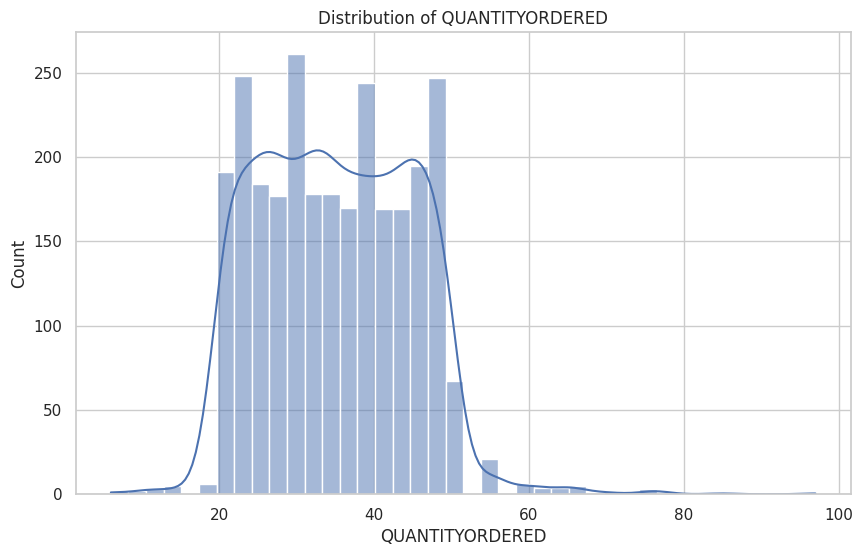

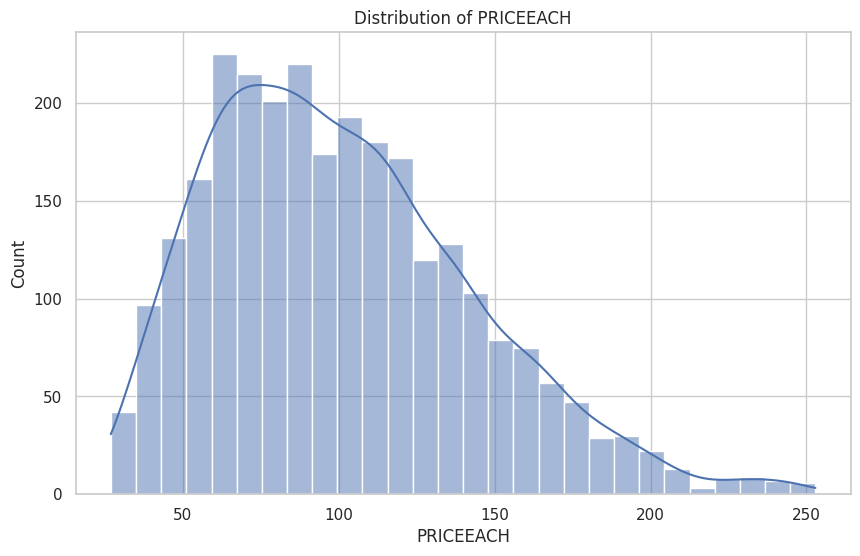

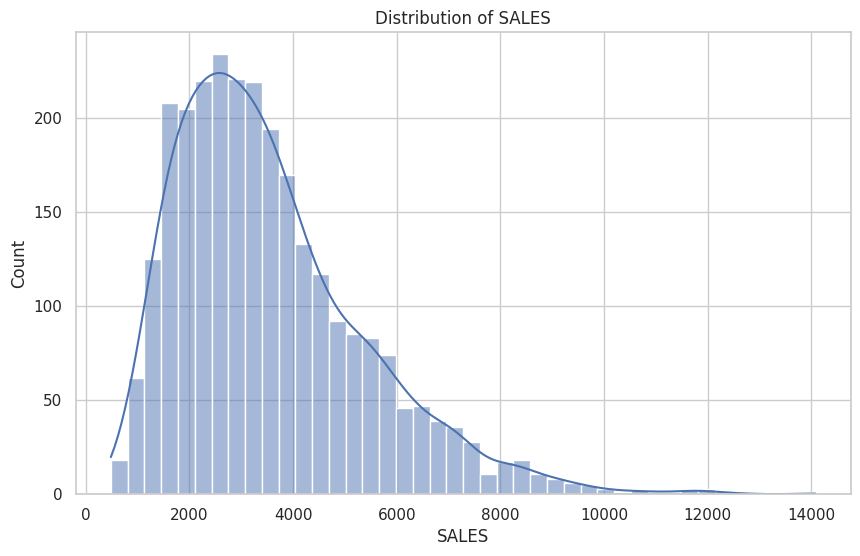

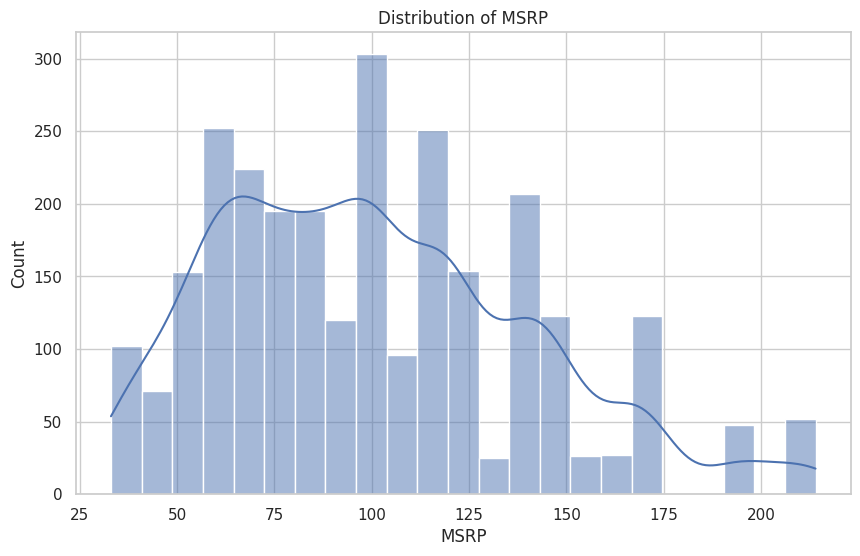

In [32]:
# Distribution of numerical features
numerical_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

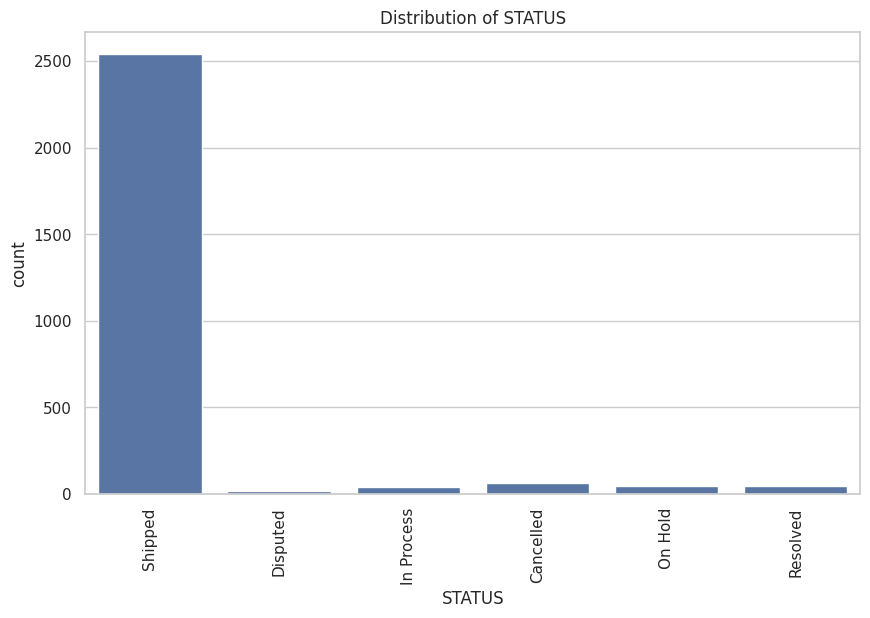

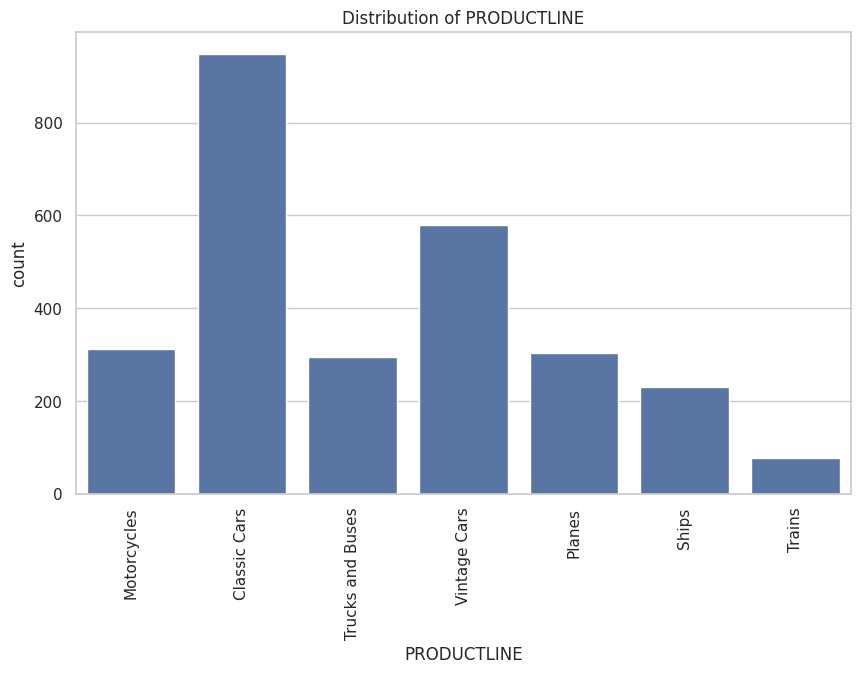

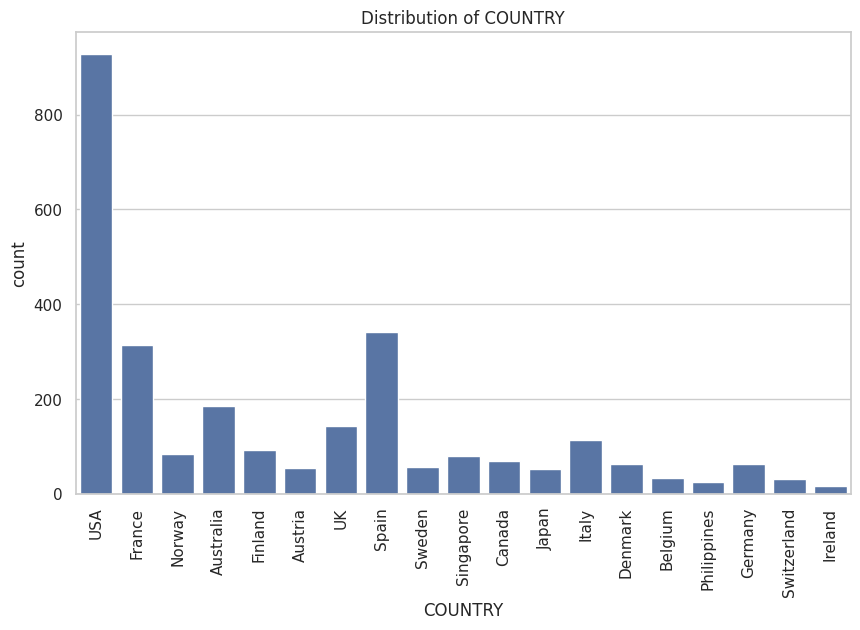

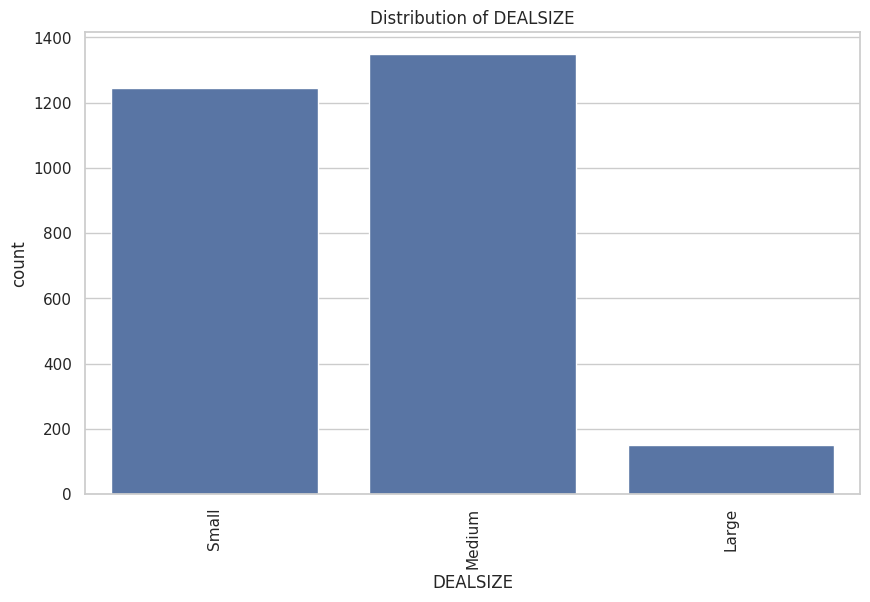

In [33]:
# Distribution of categorical features
categorical_features = ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

**Bivariate Analysis**

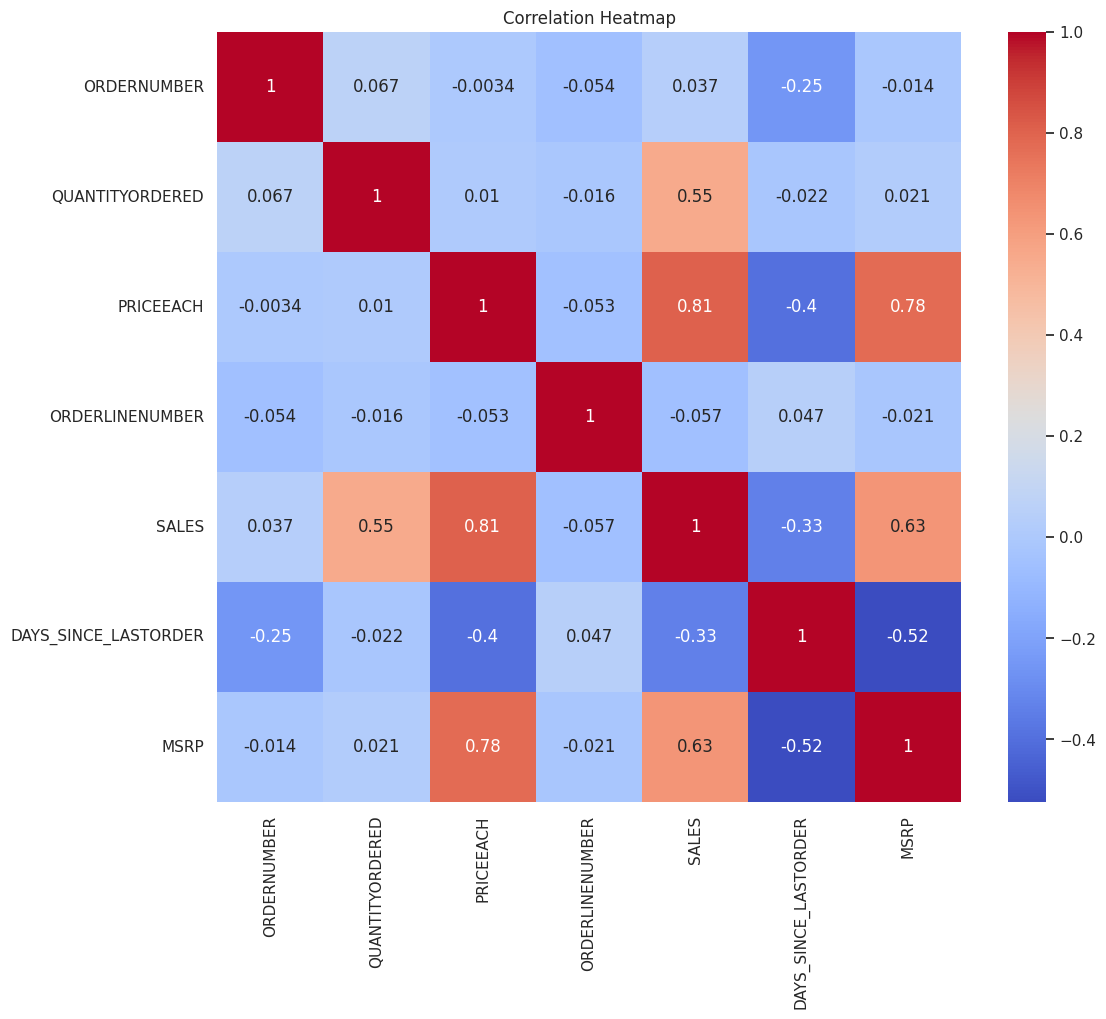

In [34]:
# Relationships between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


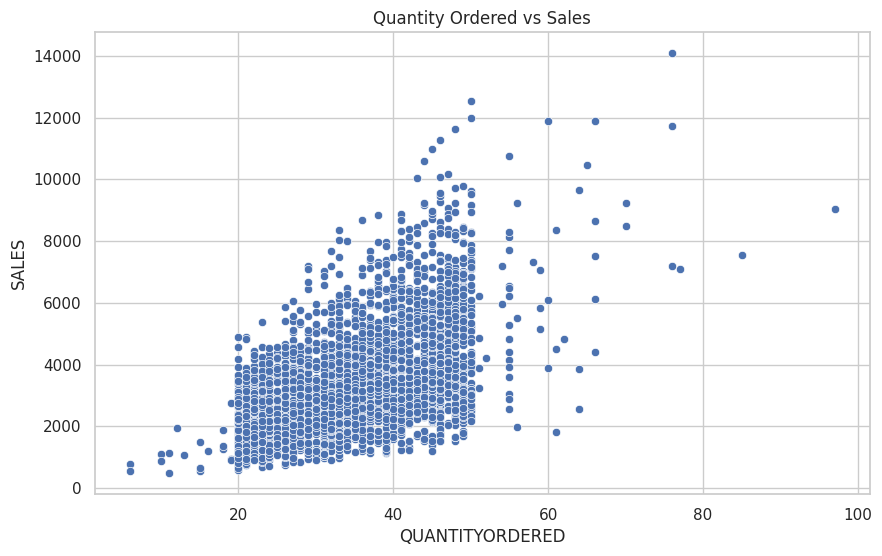

In [35]:
# Scatter plot between QUANTITYORDERED and SALES
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=data)
plt.title('Quantity Ordered vs Sales')
plt.show()

**Time Series Analysis**

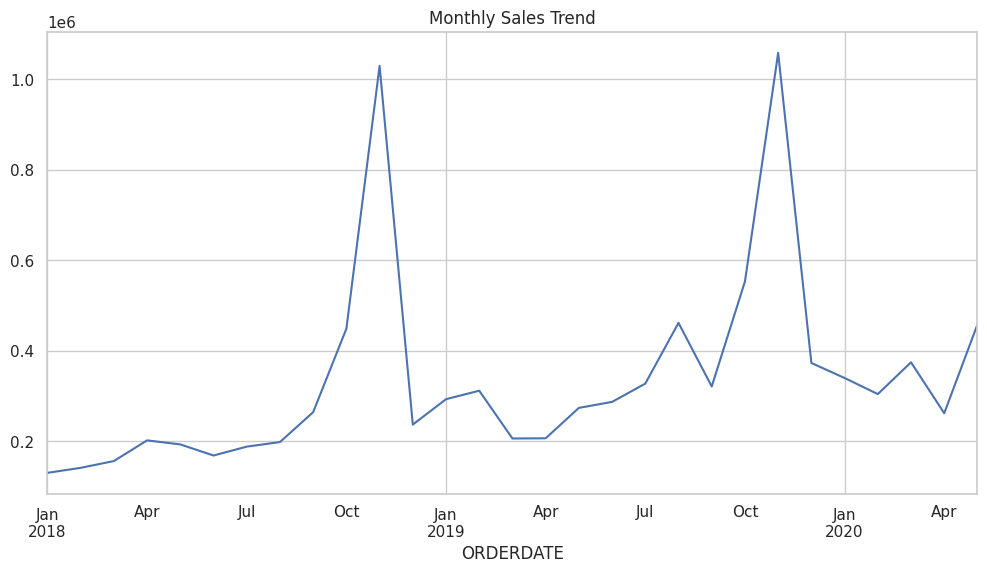

In [36]:
# Trend analysis on ORDERDATE
data.set_index('ORDERDATE', inplace=True)

# Plotting sales over time
plt.figure(figsize=(12, 6))
data['SALES'].resample('M').sum().plot()
plt.title('Monthly Sales Trend')
plt.show()